Medical Inventory Optimization (Python Document Submission)

In [2]:
#Data Preprocessing
import pandas as pd

In [4]:
# Load the dataset
df = pd.read_csv('Medical Inventory Optimaization Dataset.csv')

In [5]:
# Print the dataset
print(df.head())

  Typeofsales   Patient_ID    Specialisation         Dept  Dateofbill  \
0        Sale  12018098765   Specialisation6  Department1    6-1-2022   
1        Sale  12018103897   Specialisation7  Department1   7/23/2022   
2        Sale  12018101123   Specialisation2  Department3   6/23/2022   
3        Sale  12018079281  Specialisation40  Department1   3/17/2022   
4        Sale  12018117928   Specialisation5  Department1  12/21/2022   

   Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0         1               0      55.406       59.260     0.0       Form1   
1         1               0     768.638      950.800     0.0       Form1   
2         1               0     774.266     4004.214     0.0       Form2   
3         2               0      40.798       81.044     0.0       Form1   
4         1               0      40.434       40.504     0.0       Form1   

                            DrugName              SubCat  \
0          ZINC ACETATE 20MG/5ML SYP  SYRUP 

In [6]:
# Check for missing values
print(df.isnull().sum())

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        653
DrugName          1668
SubCat            1668
SubCat1           1692
dtype: int64


In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)

EDA: (Exploratory Data Analysis)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

         Patient_ID      Quantity  ReturnQuantity    Final_Cost   Final_Sales  \
count  1.202200e+04  12022.000000    12022.000000  12022.000000  12022.000000   
mean   1.201809e+10      1.923890        0.192896    133.362686    238.114719   
std    2.816281e+04      3.574621        0.831422    500.424203    702.374767   
min    1.201800e+10      0.000000        0.000000     40.000000      0.000000   
25%    1.201808e+10      1.000000        0.000000     44.928000     47.860000   
50%    1.201809e+10      1.000000        0.000000     54.292000     87.800000   
75%    1.201811e+10      2.000000        0.000000     83.646500    181.000000   
max    1.201813e+10    150.000000       20.000000  33178.000000  39490.000000   

             RtnMRP  
count  12022.000000  
mean      20.280106  
std      152.514239  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     8014.000000  


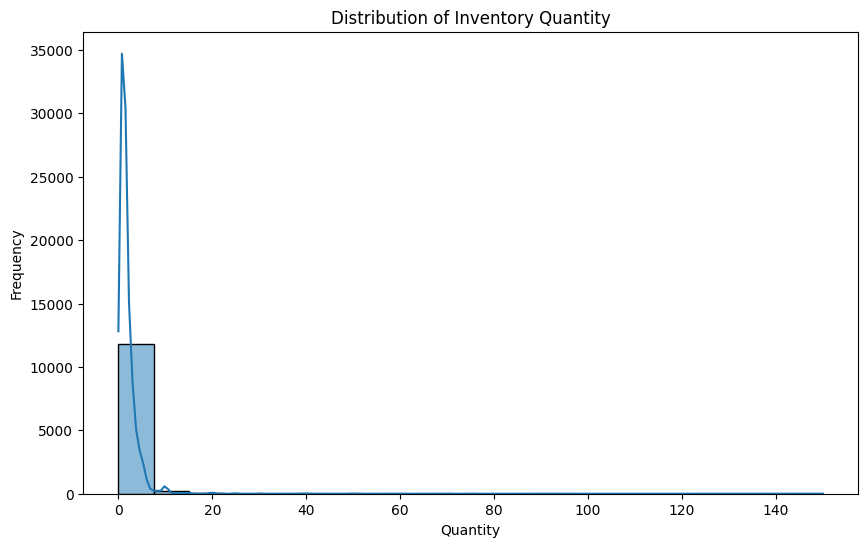

In [10]:
# Visualize inventory quantity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=20, kde=True)
plt.title('Distribution of Inventory Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

<ipython-input-11-8559c8955feb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


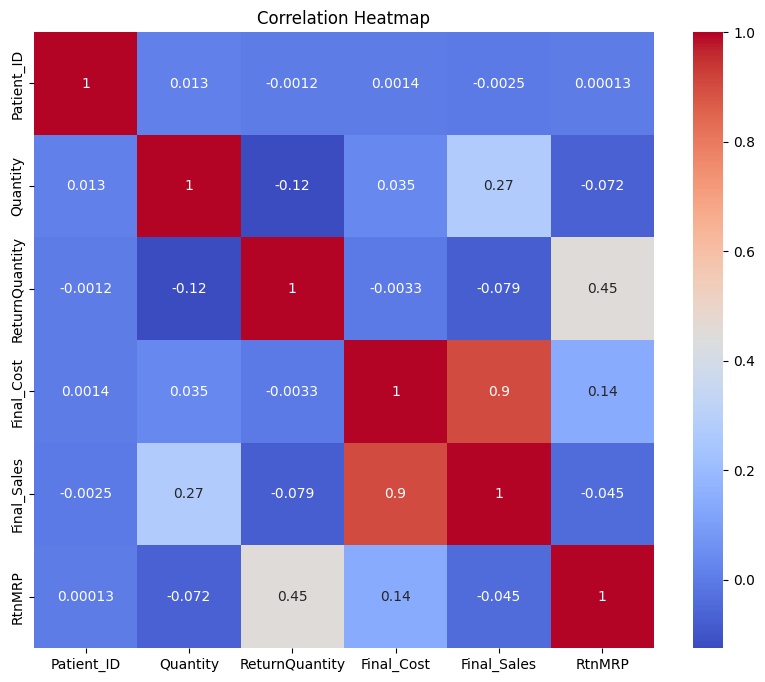

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Optimization Techniques

In [26]:
from scipy.optimize import minimize
import numpy as np

# Assuming 'Final_Cost' is the correct column name in your DataFrame
def cost_function(x, df):
    if 'Final_Cost' not in df.columns:
        raise KeyError("'Final_Cost' column not found in the DataFrame.")

    # Repeat and trim 'x' to match the length of 'Final_Cost'
    x_repeated = np.repeat(x, len(df) // len(x) + 1)[:len(df)]

    return sum(df['Final_Cost'] * x_repeated)

"\n# Check column names and display DataFrame information\nprint(df.columns)\nprint(df.head())\n\n# Constraints\nconstraints = ({'type': 'eq', 'fun': lambda x: sum(x) - 1})  # Example constraint (sum of weights should be 1)\n\n# Initial guess\nx0 = [0.5, 0.5]  # Example initial guess for weights\n\n# Minimize the cost function\nresult = minimize(cost_function, x0, constraints=constraints, args=(df,))\n\n# Optimal values\noptimal_weights = result.x\nprint('Optimal Weights:', optimal_weights)\n"

In [27]:
# Check column names and display DataFrame information
print(df.columns)
print(df.head())

Index(['Typeofsales', 'Patient_ID', 'Specialisation', 'Dept', 'Dateofbill',
       'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP',
       'Formulation', 'DrugName', 'SubCat', 'SubCat1'],
      dtype='object')
  Typeofsales   Patient_ID    Specialisation         Dept  Dateofbill  \
0        Sale  12018098765   Specialisation6  Department1    6-1-2022   
1        Sale  12018103897   Specialisation7  Department1   7/23/2022   
2        Sale  12018101123   Specialisation2  Department3   6/23/2022   
3        Sale  12018079281  Specialisation40  Department1   3/17/2022   
4        Sale  12018117928   Specialisation5  Department1  12/21/2022   

   Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0         1               0      55.406       59.260     0.0       Form1   
1         1               0     768.638      950.800     0.0       Form1   
2         1               0     774.266     4004.214     0.0       Form2   
3         2               0

In [28]:
# Constraints
constraints = ({'type': 'eq', 'fun': lambda x: sum(x) - 1})  # Example constraint (sum of weights should be 1)


In [29]:
# Initial guess
x0 = [0.5, 0.5]  # Example initial guess for weights

In [30]:
# Minimize the cost function
result = minimize(cost_function, x0, constraints=constraints, args=(df,))

In [31]:
# Optimal values
optimal_weights = result.x
print('Optimal Weights:', optimal_weights)

Optimal Weights: [-71547280.05986114  71547281.05986114]


Data Visualization

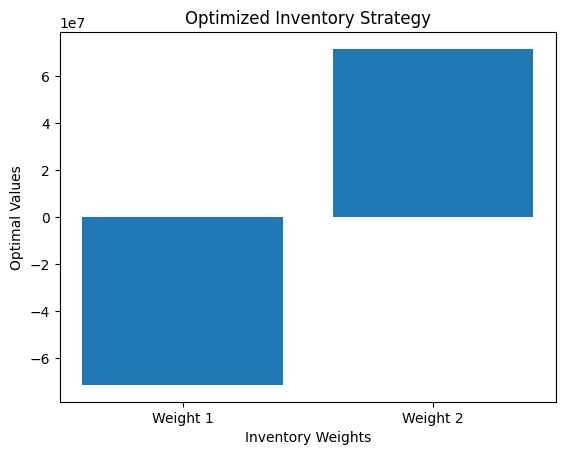

In [25]:
# Visualize optimized inventory strategy
plt.bar(['Weight 1', 'Weight 2'], optimal_weights)
plt.xlabel('Inventory Weights')
plt.ylabel('Optimal Values')
plt.title('Optimized Inventory Strategy')
plt.show()